In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("covid_19_clean_complete.csv")
confirmed, deaths = df["Confirmed"], df["Deaths"]

In [119]:
confirmed.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Confirmed, dtype: int64

In [120]:
deaths.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Deaths, dtype: int64

In [121]:
def count_occur_numbers(dataframe):
    count_total = 0
    number_occur = {}
    for current in dataframe:
        for number in str(current):
            number = int(number)
            if number != 0:
                if number not in number_occur:
                    number_occur[number] = 0
                number_occur[number] += 1
                count_total = count_total + 1
    return number_occur

def number_probability(number_occur, total):
    probability = list()
    indexes = list()
    for index in number_occur:
        indexes.append(index[0])
        probability.append(round(index[1] / total, 4))
    return indexes, probability

In [122]:
number_occur = count_occur_numbers(deaths)
total_sum = sum(number_occur.values())
number_occur = sorted(number_occur.items(), key=lambda x: x[1], reverse=True)

In [123]:
indexes, probability = number_probability(number_occur, total_sum)

In [124]:
def distribution_plot(X, y):
    figure(figsize=(8, 6), dpi=80)
    plt.scatter(X, y)

    z = np.polyfit(X, y, 1)
    p = np.poly1d(z)
    
    plt.plot(X, p(X),"r--")
    plt.xticks(np.arange(len(X)))
    plt.title("Probability")
    plt.xlabel("Number occur")
    plt.ylabel("Proba")
    plt.bar(X, y)

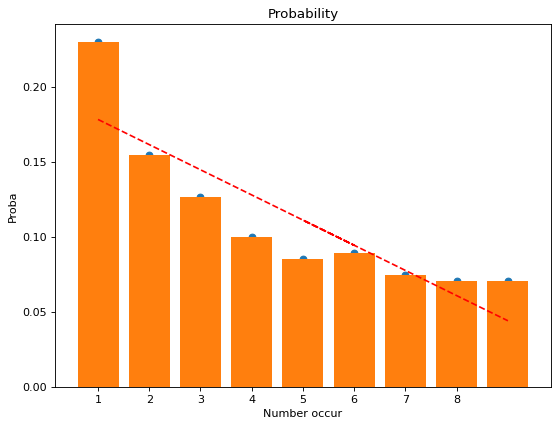

In [127]:
distribution_plot(X=indexes, y=probability)